<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data exploration</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Algorithm-choice" data-toc-modified-id="Algorithm-choice-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Algorithm choice</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#MLPClassifier" data-toc-modified-id="MLPClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>MLPClassifier</a></span></li><li><span><a href="#KNeighborsClassifier" data-toc-modified-id="KNeighborsClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>KNeighborsClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#SGDClassifier" data-toc-modified-id="SGDClassifier-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>SGDClassifier</a></span></li><li><span><a href="#SVC" data-toc-modified-id="SVC-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>SVC</a></span></li><li><span><a href="#LinearSVC" data-toc-modified-id="LinearSVC-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>LinearSVC</a></span></li></ul></li><li><span><a href="#Tuning-and-validation" data-toc-modified-id="Tuning-and-validation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tuning and validation</a></span><ul class="toc-item"><li><span><a href="#Tuning-and-validation-of-LinearSVC" data-toc-modified-id="Tuning-and-validation-of-LinearSVC-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tuning and validation of LinearSVC</a></span></li><li><span><a href="#Tuning-and-validation-of-SGDClassifier" data-toc-modified-id="Tuning-and-validation-of-SGDClassifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Tuning and validation of SGDClassifier</a></span></li></ul></li><li><span><a href="#Output" data-toc-modified-id="Output-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Output</a></span></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import pattern.it
from stop_words import get_stop_words

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lucab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data exploration

In [2]:
df = pd.read_csv('./development.csv')
df.head(10)

,text,class
0,Non è l'hotel più lussuoso in cui abbia mai so...,pos
1,Siamo stati qui per 1 notte prima della nostra...,pos
2,Hotel è ben posizionato per visitare Torino. A...,pos
3,All'arrivo la cordialità e disponibilità dello...,pos
4,Abbiamo soggiornato per due notti alla fine de...,pos
5,Ho soggiornato nell'hotel Acca Palace per una ...,pos
6,Struttura a due passi dalla stazione di mestre...,pos
7,Ho transitato in questa struttura per qualche ...,pos
8,"un ottimo hotel in zona centrale,molto partico...",pos
9,"Sono stato all hotel la Pergola l, estate scor...",pos


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28754 entries, 0 to 28753
Data columns (total 2 columns):
text     28754 non-null object
class    28754 non-null object
dtypes: object(2)
memory usage: 449.4+ KB


In [4]:
df_eval = pd.read_csv('./evaluation.csv')
df_eval.head(10)

,text
0,Mi sono fermato una sola notte essendo di pass...
1,Ho prenotato questo hotel per essere vicino al...
2,Si tratta di un hotel di lusso costruito nel X...
3,Arrivo alle 23:30 faccio check in e chiedo la ...
4,Sono pochi gli Hotel che riescono a coniugare ...
5,Abbiamo soggiornato per una notte in questo Ho...
6,"Sì, questa è la mia seconda volta, durante un ..."
7,Sono andato a dare una conferenza per 3 giorni...
8,"Sono stato in questa struttura per lavoro, in ..."
9,Recentemente abbiamo visitato Ad place per un ...


In [5]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12323 entries, 0 to 12322
Data columns (total 1 columns):
text    12323 non-null object
dtypes: object(1)
memory usage: 96.4+ KB


In [6]:
df['class'].unique()

array(['pos', 'neg'], dtype=object)

In [7]:
Counter(df['class'])

Counter({'pos': 19532, 'neg': 9222})

In [8]:
num_pos = len(df.loc[df['class']=='pos'])
num_neg = len(df.loc[df['class']=='neg'])
print("Percentage of positives: %2.2f%%" %(num_pos/(num_pos+num_neg)*100))
print("Percentage of negatives: %2.2f%%" %(num_neg/(num_pos+num_neg)*100))

Percentage of positives: 67.93%
Percentage of negatives: 32.07%


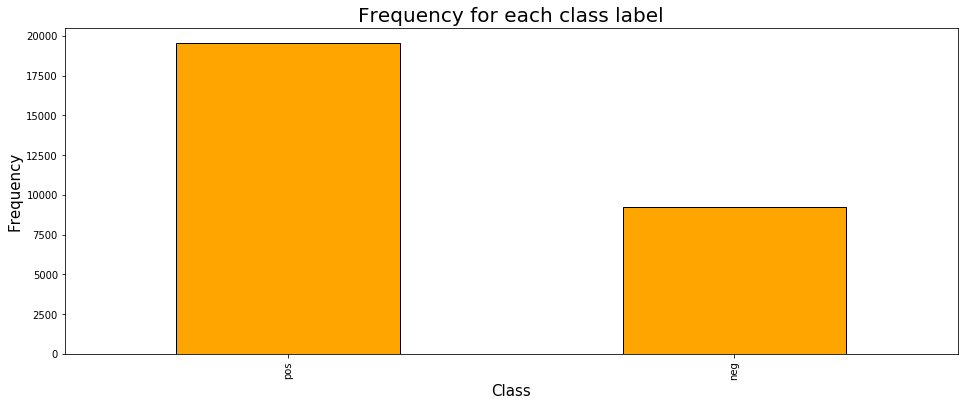

In [9]:
plt.figure(figsize=(16, 6))
df['class'].value_counts().plot('bar',facecolor='orange',edgecolor='black')
plt.title('Frequency for each class label', fontsize=20)
plt.xlabel('Class', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [10]:
for ind in df.index:
    df.loc[ind,'len_text'] = len(df.loc[ind,'text'])
df.head(10)

,text,class,len_text
0,Non è l'hotel più lussuoso in cui abbia mai so...,pos,4284.0
1,Siamo stati qui per 1 notte prima della nostra...,pos,308.0
2,Hotel è ben posizionato per visitare Torino. A...,pos,384.0
3,All'arrivo la cordialità e disponibilità dello...,pos,240.0
4,Abbiamo soggiornato per due notti alla fine de...,pos,411.0
5,Ho soggiornato nell'hotel Acca Palace per una ...,pos,545.0
6,Struttura a due passi dalla stazione di mestre...,pos,233.0
7,Ho transitato in questa struttura per qualche ...,pos,635.0
8,"un ottimo hotel in zona centrale,molto partico...",pos,306.0
9,"Sono stato all hotel la Pergola l, estate scor...",pos,657.0


In [11]:
df.describe()

,len_text
count,28754.000000
mean,701.431662
std,606.395492
min,58.000000
25%,325.000000
50%,515.000000
75%,850.750000
max,9153.000000


In [12]:
for ind in df_eval.index:
    df_eval.loc[ind,'len_text'] = len(df_eval.loc[ind,'text'])
df_eval.head(10)

,text,len_text
0,Mi sono fermato una sola notte essendo di pass...,230.0
1,Ho prenotato questo hotel per essere vicino al...,1133.0
2,Si tratta di un hotel di lusso costruito nel X...,482.0
3,Arrivo alle 23:30 faccio check in e chiedo la ...,760.0
4,Sono pochi gli Hotel che riescono a coniugare ...,558.0
5,Abbiamo soggiornato per una notte in questo Ho...,613.0
6,"Sì, questa è la mia seconda volta, durante un ...",492.0
7,Sono andato a dare una conferenza per 3 giorni...,663.0
8,"Sono stato in questa struttura per lavoro, in ...",385.0
9,Recentemente abbiamo visitato Ad place per un ...,1459.0


In [13]:
df_eval.describe()

,len_text
count,12323.000000
mean,699.206119
std,605.312323
min,65.000000
25%,323.000000
50%,515.000000
75%,854.000000
max,9221.000000


In [14]:
df.groupby('class')['len_text'].mean()

class
neg    864.228475
pos    624.567428
Name: len_text, dtype: float64

In [15]:
df.groupby('class').describe().transpose()

class                   neg           pos
len_text count  9222.000000  19532.000000
         mean    864.228475    624.567428
         std     740.823934    513.623093
         min      67.000000     58.000000
         25%     393.000000    307.000000
         50%     644.000000    465.000000
         75%    1071.000000    752.000000
         max    9153.000000   7800.000000

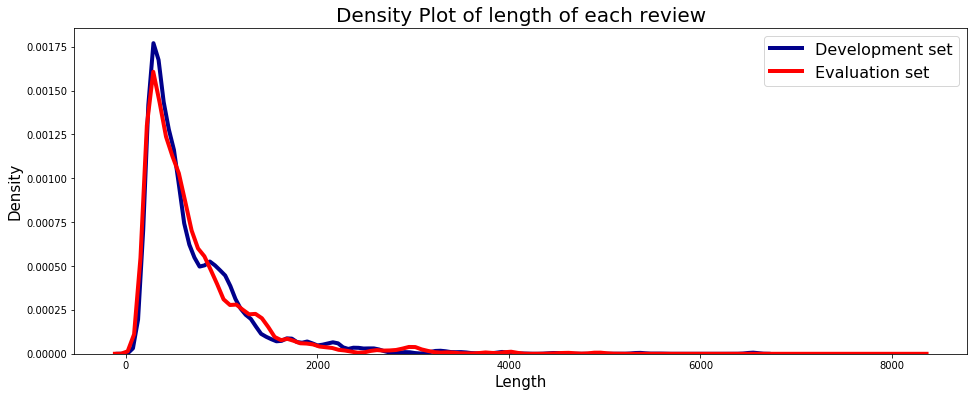

In [16]:
plt.figure(figsize=(16, 6))
# Density Plot and Histogram of length of each review
sns.distplot(df.loc[df['len_text'],'len_text'], kde=True, hist=False,
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Development set')
sns.distplot(df_eval.loc[df_eval['len_text'],'len_text'], kde=True, hist=False,
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='Evaluation set')
# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density Plot of length of each review', fontsize=20)
plt.xlabel('Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [17]:
perc90 = np.percentile(df['len_text'], 90)
perc90

1345.0

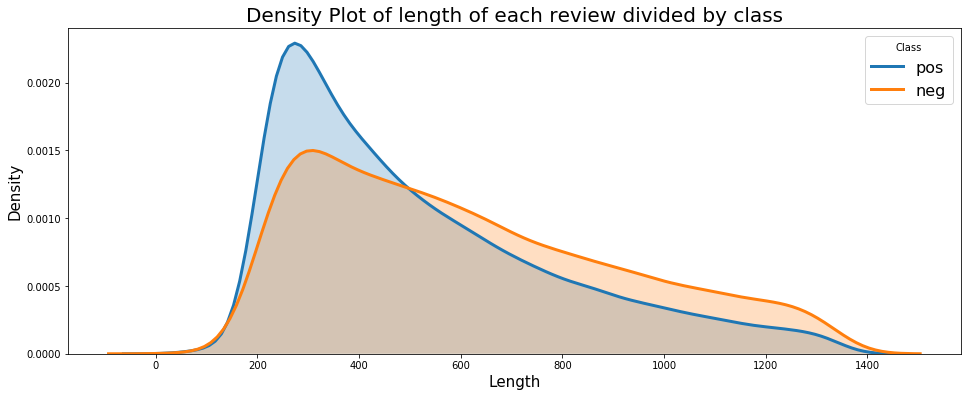

In [18]:
# List of classes to plot
classes = ['pos', 'neg']

plt.figure(figsize=(16, 6))
# Iterate through the classes
for id_class in classes:
    # Subset to the class
    subset = df[df['class'] == id_class]
    
    # Draw the density plot
    sns.distplot(subset.loc[subset['len_text']<perc90,'len_text'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = id_class)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Class')
plt.title('Density Plot of length of each review divided by class', fontsize=20)
plt.xlabel('Length', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

# Preprocessing

In [91]:
X = df['text']
X_eval = df_eval['text']

In [20]:
def lemmatize_word(input_word):
    in_word = input_word
    word_it = pattern.it.parse(
        in_word, 
        tokenize=False,  
        tag=False,  
        chunk=False, 
        lemmata=True 
    )
    the_lemmatized_word = word_it.split()[0][0][4]
    return the_lemmatized_word

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords as sw
from nltk.stem import SnowballStemmer
import re
import string
import emoji
from alphabet_detector import AlphabetDetector

class LemmaTokenizer(object):
    def __init__(self):
        self.stemmer = SnowballStemmer("italian")
        self.ad = AlphabetDetector()
    
    def __call__(self, document):
        lemmas = []
        re_digit = re.compile("[0-9:]") # regular expression to filter digit tokens
        
        for t in word_tokenize(document):
            t = t.strip() # elimination of spaces at the beginning and end
            t = t.strip(".-/_+*':…,°€£|^´`=\\~–״") # elimination of symbols at the beginning and end
            
            # separation caused by punctuation characters excluding -
            t = re.split(";|\.|\:|…|,|\*|/|_|\+|\n|'|°|€|£|\||\^|´|`|=|~|״",t)
            
            for s in t:
                if len(s)>=2:
                    # I control words that are not just numbers and letters
                    if not s.isalnum():
                        s_aux = ""
                        for c in s: # scan characters in search of emojis, dashes, particular symbols and non-Latin characters
                            if c not in emoji.UNICODE_EMOJI and c != '-' and c!='–' and c!='\\' \
                            and c!=u"\u200b" and c!=u"\ufe0f" and c!=u"\uff0c" and c!=u"\u00d7"\
                            and c!=u"\u2022" and c!=u"\u3002"and self.ad.is_latin(c):
                                s_aux = s_aux + c
                        s = s_aux # word without emoji, dashes, special symbols and non-Latin characters

                    # words that contain both numbers and letters, then I delete numbers
                    if (not (s.isalpha() or s.isdecimal())) and s.isalnum():
                        s_alpha = ""
                        for c in s: # scan characters in search of letters
                                if c.isalpha():
                                    s_alpha = s_alpha + c
                        s = s_alpha # words without numbers

                    lemma = lemmatize_word(s)
                    lemma = self.stemmer.stem(lemma)

                    # remove tokens with only punctuation chars and digits
                    if lemma not in string.punctuation and \
                       len(lemma) >= 2 and \
                       len(lemma) < 16 and \
                       not re_digit.match(lemma) and\
                       self.ad.is_latin(lemma):
                        lemmas.append(lemma)
                
        return lemmas

In [22]:
import unicodedata

def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)

In [23]:
stopwords = list(set(get_stop_words('italian') + nltk.corpus.stopwords.words('italian')))

# I get an error if they have already been removed previously
try:
    stopwords.remove('non')
except:
    pass
try:
    stopwords.remove('no')
except:
    pass
try:
    stopwords.remove('senza')
except:
    pass

print(stopwords)

['stanno', 'tua', 'sarebbe', 'pochi', 'stavamo', 'saremo', 'quanta', 'faresti', 'sull', 'poco', 'farò', 'faccio', 'ad', 'fece', 'vi', 'allo', 'avevi', 'dei', 'tuo', 'nella', 'abbiate', 'gli', 'delle', 'una', 'con', 'altre', 'a', 'fui', 'nostri', 'stando', 'col', 'chi', 'tuoi', 'vostro', 'stavate', 'come', 'tu', 'questi', 'aveste', 'starebbe', 'stiamo', 'avevo', 'stare', 'avesti', 'la', 'stesse', 'feci', 'foste', 'lo', 'avendo', 'i', 'facevano', 'facciamo', 'avrei', 'negl', 'è', 'tue', 'stesso', 'stette', 'vostra', 'degl', 'perché', 'stavo', 'dallo', 'stiate', 'starete', 'fino', 'stessero', 'sei', 'vostre', 'in', 'o', 'vostri', 'di', 'avesse', 'all', 'avrebbero', 'farà', 'fossi', 'fosti', 'fanno', 'mia', 'eravate', 'sue', 'ecco', 'eravamo', 'della', 'nelle', 'aveva', 'stareste', 'uno', 'avuti', 'ci', 'abbiamo', 'essendo', 'avrete', 'avessimo', 'ne', 'anche', 'da', 'staremmo', 'su', 'contro', 'avemmo', 'alle', 'avrò', 'ho', 'le', 'ed', 'faremmo', 'saranno', 'staremo', 'sotto', 'stava', '

In [28]:
tokenizer = LemmaTokenizer()
stop_words_tok = []
for sw in stopwords:
    sw_no_acc = strip_accents(sw)
    sw_tok = tokenizer(sw_no_acc)
    if len(sw_tok)>0:
        stop_words_tok.append(sw_tok[0])
stop_words_tok = list(set(stop_words_tok))
print(stop_words_tok)

['all', 'farsen', 'nei', 'tua', 'dentr', 'quant', 'mia', 'sia', 'sar', 'al', 'ecco', 'foss', 'sugl', 'avro', 'nel', 'sull', 'un', 'esser', 'com', 'piu', 'uno', 'si', 'ad', 'dov', 'nostr', 'ci', 'vi', 'alla', 'allo', 'noi', 'dei', 'facc', 'coi', 'ne', 'anche', 'da', 'quell', 'tuo', 'perc', 'qui', 'su', 'del', 'altra', 'li', 'fac', 'fec', 'aglo', 'alle', 'dagl', 'una', 'con', 'sti', 'col', 'te', 'poc', 'ebbo', 'chi', 'le', 'ed', 'sopr', 'dell', 'quest', 'agl', 'me', 'lor', 'mio', 'tu', 'qua', 'sul', 'aver', 'ma', 'sua', 'ancor', 'altro', 'la', 'se', 'tra', 'allor', 'per', 'sott', 'dal', 'vostr', 'il', 'fin', 'lo', 'far', 'lei', 'giu', 'sui', 'lui', 'star', 'negl', 'mie', 'quind', 'io', 'avra', 'ti', 'ai', 'contr', 'degl', 'nell', 'vao', 'dai', 'avut', 'qual', 'suo', 'dall', 'mi', 'quas', 'cui', 'fra', 'adess', 'in', 'voi', 'stess', 'che', 'tutt', 'di']


In [74]:
vectorizer = TfidfVectorizer(input='content', tokenizer=LemmaTokenizer(),\
                             stop_words=stop_words_tok,\
                             strip_accents='ascii', lowercase=True, ngram_range=(1,3))

vectorizer.fit(pd.concat((X,X_eval)))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['all', 'farsen', 'nei', 'tua', 'dentr', 'quant',
                            'mia', 'sia', 'sar', 'al', 'ecco', 'foss', 'sugl',
                            'avro', 'nel', 'sull', 'un', 'esser', 'com', 'piu',
                            'uno', 'si', 'ad', 'dov', 'nostr', 'ci', 'vi',
                            'alla', 'allo', 'noi', ...],
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<__main__.LemmaTokenizer object at 0x000001D03BF73470>,
                use_idf=True, vocabulary=None)

In [75]:
X_tfidf = vectorizer.transform(X)
X_tfidf

<28754x2856518 sparse matrix of type '<class 'numpy.float64'>'
	with 4927112 stored elements in Compressed Sparse Row format>

In [76]:
X_tfidf_eval = vectorizer.transform(X_eval)
X_tfidf_eval

<12323x2856518 sparse matrix of type '<class 'numpy.float64'>'
	with 2107251 stored elements in Compressed Sparse Row format>

In [77]:
# print first 100 feature names
print(vectorizer.get_feature_names()[:100])

['aa', 'aa frig', 'aa frig camer', 'aa venez', 'aa venez citt', 'aaa', 'aaa prenot', 'aaa prenot hotel', 'aaaaaa', 'aaaaaa normal', 'aaaaaa normal inutil', 'aaaaaaaa', 'aaaaaaaa impossibil', 'aaaaaaaa impossibil ser', 'aabout', 'aabout reception', 'aabout reception dimension', 'aaccoglient', 'aaccoglient non', 'aaccoglient non mil', 'aaccoglit', 'aaccoglit stup', 'aaccoglit stup personal', 'aao', 'aao sacchett', 'aao sacchett lim', 'aapen', 'aapen ago', 'aapen ago mogl', 'aaron', 'aaron aprir', 'aaron aprir circ', 'aaron mentr', 'aaron mentr visit', 'aaron nikol', 'aaron nikol molt', 'aaron non', 'aaron non pot', 'aaron personal', 'aaron personal cordial', 'aaron piuttost', 'aaron piuttost adatt', 'aaron sol', 'aaron sol nott', 'aaron vist', 'aaron vist sol', 'ababst', 'ababst disponibil', 'ababst disponibil part', 'abacus', 'abacus sest', 'abacus sest bell', 'abacus sest cost', 'abadjour', 'abadjour tropp', 'abadjour tropp soffus', 'abajour', 'abajour bagn', 'abajour bagn specc', 'aba

In [78]:
d = dict(enumerate(df['class'].astype('category').cat.categories))
print (d)
y = df['class'].astype('category').cat.codes
print(y.head(10))

{0: 'neg', 1: 'pos'}
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int8


# Algorithm choice

In [41]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, shuffle=True)

In [43]:
c = Counter(y_train)
print("train")
for i in [0,1]:
    print(d[i], c[i]/len(y_train))
c = Counter(y_test)
print("test")
for i in [0,1]:
    print(d[i], c[i]/len(y_test))

train
neg 0.320704845814978
pos 0.6792951541850221
test
neg 0.3207678397551815
pos 0.6792321602448185


## DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
# Classification model that we want to configure:
clf = DecisionTreeClassifier()

# Parameter grid
# Specify in a dictionary a key for each parameter to be configured and the list of its values
# The keys in the dictionary must match the parameter names of the model constructor
param_grid = {'criterion':["gini","entropy"],
              'splitter':["best","random"],
              'max_features':["sqrt","auto","log2",None],
              'class_weight':["balanced",None]}

# Configure grid search with the model and the parameter grid
# The best model is computed based on the scoring function (f1) and with cross-validation (cv)
gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5, n_jobs=-1)

# Optimize the model parameters with cross-validation on the training data
# The best model configuration is the one with highest f1 score
res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

## RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(100, max_features='sqrt',n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {'n_estimators':list(range(50,101,10)), 
              'criterion':["entropy","gini"],
              'max_features':["sqrt","log2"],
              'class_weight':["balanced","balanced_subsample", None]}

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
final_model = res.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

## MLPClassifier

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',shuffle=True)
#Fitting the training data to the network
classifier.fit(X_train, y_train)
#Predicting y for X_test
y_pred = classifier.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
# Classifier model that we want to configure:
clf = MLPClassifier(max_iter=300,shuffle=True)

param_grid = {'hidden_layer_sizes':[(150,100,50)],
              'activation': ['relu','identity','logistic','tanh'],
              'solver':['adam'],
              'learning_rate':['constant','invscaling','adaptive']}

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=3,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

## KNeighborsClassifier

In [ ]:
#create new a knn model
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 40,5),
              'weights': ['uniform','distance']
             }

gridsearch = GridSearchCV(knn, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

## LogisticRegression

In [ ]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

In [ ]:
# Classifier model that we want to configure:
logreg = LogisticRegression()

param_grid = {'penalty':['l2','none'],
              'solver':['newton-cg','lbfgs','sag','saga'],
              'class_weight':['auto','balanced',None]}

gridsearch = GridSearchCV(logreg, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

In [ ]:
# Classifier model that we want to configure:
logreg = LogisticRegression()

param_grid = {'penalty':['elasticnet'],
              'solver':['saga'],
              'l1_ratio':np.linspace(0,1,num=11)}

gridsearch = GridSearchCV(logreg, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

## SGDClassifier

In [ ]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

In [ ]:
# Classifier model that we want to configure:
clf = SGDClassifier(n_jobs=-1)

param_grid = {'penalty':['l2','l1','elasticnet'],
              'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],\
                      #'squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],
              'class_weight':['balanced',None],
              'alpha':[0.000001,0.00001,0.0001],#,0.001,0.01,0.1],
              'learning_rate':['constant','optimal','invscaling','adaptive'],
              'eta0':[0.00001]
             }

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

## SVC

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

In [ ]:
# Classifier model that we want to configure:
clf = SVC(kernel='linear')

param_grid = {'C':np.linspace(0.1,3,num=10)}

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

## LinearSVC

In [ ]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

In [ ]:
# Classifier model that we want to configure:
clf = LinearSVC()

param_grid = {'penalty':['l2'],
              'loss':['hinge','squared_hinge'],
              'C':np.linspace(0.1,3,num=10),
              'class_weight':['balanced',None]
             }

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

In [ ]:
# Classifier model that we want to configure:
clf = LinearSVC()

param_grid = {'penalty':['l1'],
              'loss':['squared_hinge'],
              'dual':[False],
              'C':np.linspace(0.1,3,num=10),
              'class_weight':['balanced',None]
             }

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5,n_jobs=-1)

res = gridsearch.fit(X_train, y_train)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

In [ ]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_train, y_train)
# Evaluate on test set
y_pred = final_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("f1 (test set): %.5f" % f1)

# Tuning and validation

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC

## Tuning and validation of LinearSVC

In [85]:
# Classifier model that we want to configure:
clf = LinearSVC(penalty='l2',dual=True,class_weight='balanced')

param_grid = {'loss':['hinge','squared_hinge'],
              'tol':[1e2,1e1,1,1e-1,1e-2,1e-3,1e-4,1e-5],
              'C':[0.1,1,10,50,100,500,1000,5000,10000]
             }

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5, n_jobs=-1)

res = gridsearch.fit(X_tfidf, y)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

Best model configuration is:
{'C': 1000, 'loss': 'hinge', 'tol': 1}
with f1=0.97490
inizio    : 176794.03
fine      : 177169.62
intervallo:    375.59


In [86]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_tfidf, y)

# Evaluate on test set
y_pred_1 = final_model.predict(X_tfidf_eval)

## Tuning and validation of SGDClassifier

In [87]:
# Classifier model that we want to configure:
clf = SGDClassifier(learning_rate='optimal',n_jobs=-1)

param_grid = {'penalty':['elasticnet'],
              'l1_ratio':np.linspace(0,0.5,num=11),
              'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],
              'alpha':[0.000001,0.000005,0.00001,0.00005,0.0001,0.001,0.01,0.1],
              'fit_intercept':[True,False],
              'tol':[1e2,1e1,1,1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
             }

gridsearch = GridSearchCV(clf, param_grid, scoring='f1', cv=5, n_jobs=-1)

res = gridsearch.fit(X_tfidf, y)

# Print result
print("Best model configuration is:")
print(res.best_params_)
print("with f1=%.5f" % res.best_score_)

Best model configuration is:
{'alpha': 5e-06, 'fit_intercept': True, 'l1_ratio': 0.45, 'loss': 'hinge', 'penalty': 'elasticnet', 'tol': 0.01}
with f1=0.97621
inizio    : 177170.06
fine      : 194809.86
intervallo:  17639.80


In [88]:
# Take the best model configuration
final_model = res.best_estimator_
# Fit on complete training set
final_model.fit(X_tfidf, y)
# Evaluate on test set
y_pred_2 = final_model.predict(X_tfidf_eval)

# Output

In [92]:
import csv

In [93]:
filename = "output1.csv"
with open(filename, mode='w') as output_file:
    output_writer = csv.writer(output_file, delimiter=',', lineterminator='\n', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    output_writer.writerow(['Id','Predicted'])
    for i in range(X_tfidf_eval.shape[0]):
        output_writer.writerow([i,d[y_pred_1[i]]])

In [94]:
filename = "output2.csv"
with open(filename, mode='w') as output_file:
    output_writer = csv.writer(output_file, delimiter=',', lineterminator='\n', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    output_writer.writerow(['Id','Predicted'])
    for i in range(X_tfidf_eval.shape[0]):
        output_writer.writerow([i,d[y_pred_2[i]]])